In [1]:
#import libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

hour_df = pd.read_csv('/Users/joeywang/Desktop/MIT data anaylytics/BSDM/Project /Bike-Sharing-Dataset/hour train.csv')

training_data, testing_data =train_test_split(hour_df, test_size=0.2, random_state=25)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")



No. of training examples: 13903
No. of testing examples: 3476


In [3]:
training_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2058,2059,2011-03-31,2,0,3,15,0,4,1,3,0.30,0.2727,0.87,0.2985,4,61,65
4458,4459,2011-07-09,3,0,7,16,0,6,0,1,0.82,0.7273,0.38,0.0000,171,245,416
3305,3306,2011-05-22,2,0,5,15,0,0,0,2,0.66,0.6212,0.61,0.1642,110,221,331
13588,13589,2012-07-25,3,1,7,9,0,3,1,1,0.72,0.6515,0.37,0.2985,65,277,342
8790,8791,2012-01-07,1,1,1,2,0,6,0,1,0.36,0.3636,0.50,0.1045,2,36,38


In [5]:
#change the data columns name 
training_data.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'weathersit':'weather_condition',
                        'atemp':'feeling_temp',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

training_data.head()

,rec_id,datetime,season,year,month,hour,holiday,weekday,workingday,weather_condition,temp,feeling_temp,humidity,windspeed,casual,registered,total_count
2058,2059,2011-03-31,2,0,3,15,0,4,1,3,0.30,0.2727,0.87,0.2985,4,61,65
4458,4459,2011-07-09,3,0,7,16,0,6,0,1,0.82,0.7273,0.38,0.0000,171,245,416
3305,3306,2011-05-22,2,0,5,15,0,0,0,2,0.66,0.6212,0.61,0.1642,110,221,331
13588,13589,2012-07-25,3,1,7,9,0,3,1,1,0.72,0.6515,0.37,0.2985,65,277,342
8790,8791,2012-01-07,1,1,1,2,0,6,0,1,0.36,0.3636,0.50,0.1045,2,36,38


In [6]:
# check missing values 
training_data.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
hour                 0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
feeling_temp         0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [7]:
training_data.duplicated().sum()

0

In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13903 entries, 2058 to 6618
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             13903 non-null  int64  
 1   datetime           13903 non-null  object 
 2   season             13903 non-null  int64  
 3   year               13903 non-null  int64  
 4   month              13903 non-null  int64  
 5   hour               13903 non-null  int64  
 6   holiday            13903 non-null  int64  
 7   weekday            13903 non-null  int64  
 8   workingday         13903 non-null  int64  
 9   weather_condition  13903 non-null  int64  
 10  temp               13903 non-null  float64
 11  feeling_temp       13903 non-null  float64
 12  humidity           13903 non-null  float64
 13  windspeed          13903 non-null  float64
 14  casual             13903 non-null  int64  
 15  registered         13903 non-null  int64  
 16  total_count        1

In [9]:
#change the column datatype 
training_data['datetime'] = pd.to_datetime(training_data.datetime)

training_data['season'] = training_data.season.astype('category')
training_data['holiday'] = training_data.holiday.astype('category')
training_data['holiday'] = training_data.holiday.astype('category')
training_data['weekday'] = hour_df.weekday.astype('category')
training_data['weather_condition'] = training_data.weather_condition.astype('category')
training_data['workingday'] = training_data.workingday.astype('category')
training_data['month'] = training_data.month.astype('category')
training_data['year'] = training_data.year.astype('category')
training_data['hour'] = training_data.hour.astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rec_id             17379 non-null  int64  
 1   datetime           17379 non-null  object 
 2   season             17379 non-null  int64  
 3   year               17379 non-null  int64  
 4   month              17379 non-null  int64  
 5   hour               17379 non-null  int64  
 6   holiday            17379 non-null  int64  
 7   weekday            17379 non-null  int64  
 8   workingday         17379 non-null  int64  
 9   weather_condition  17379 non-null  int64  
 10  temp               17379 non-null  float64
 11  feeling_temp       17379 non-null  float64
 12  humidity           17379 non-null  float64
 13  windspeed          17379 non-null  float64
 14  casual             17379 non-null  int64  
 15  registered         17379 non-null  int64  
 16  total_count        173

[Text(0.5, 1.0, 'Rental counts by seasons')]

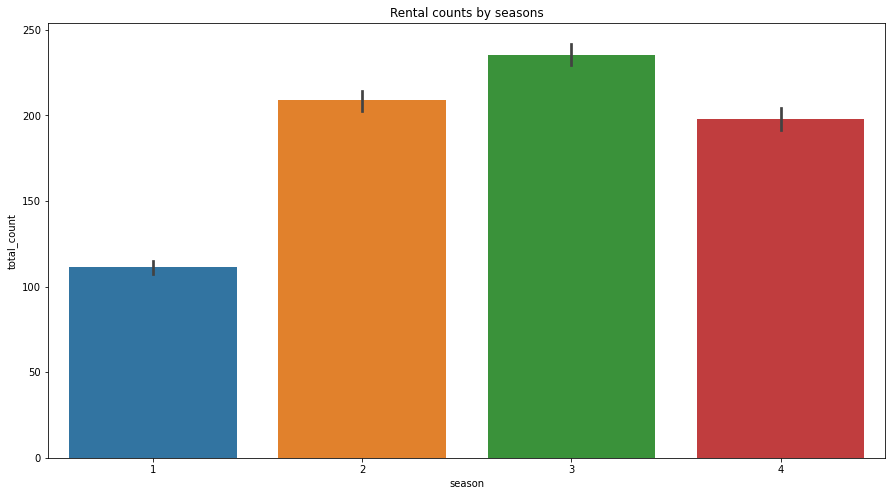

In [10]:
#bar chart 
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data=training_data[['season',
                           'total_count']],
              x='season',
              y='total_count',
              ax=ax)
ax.set(title="Rental counts by seasons")


[Text(0.5, 1.0, 'Rental counts by months')]

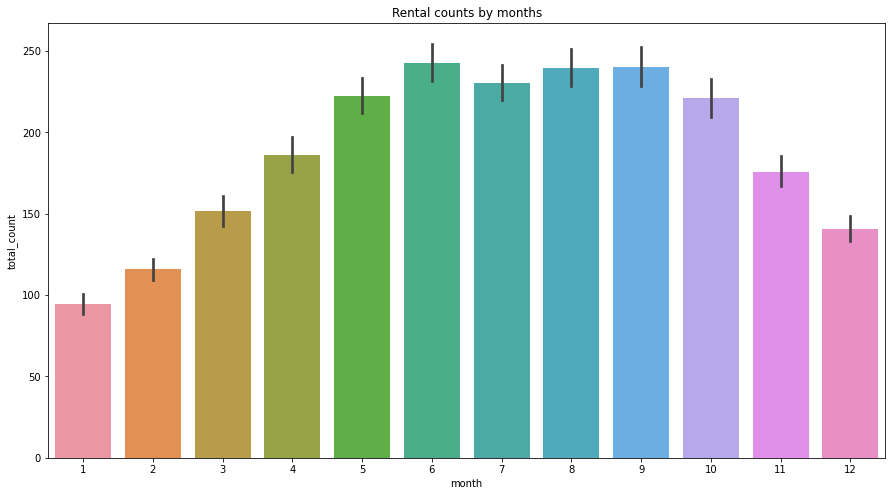

In [11]:
#bar chart 
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data=training_data[['month',
                           'total_count']],
              x='month',
              y='total_count',
              ax=ax)
ax.set(title="Rental counts by months")


[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

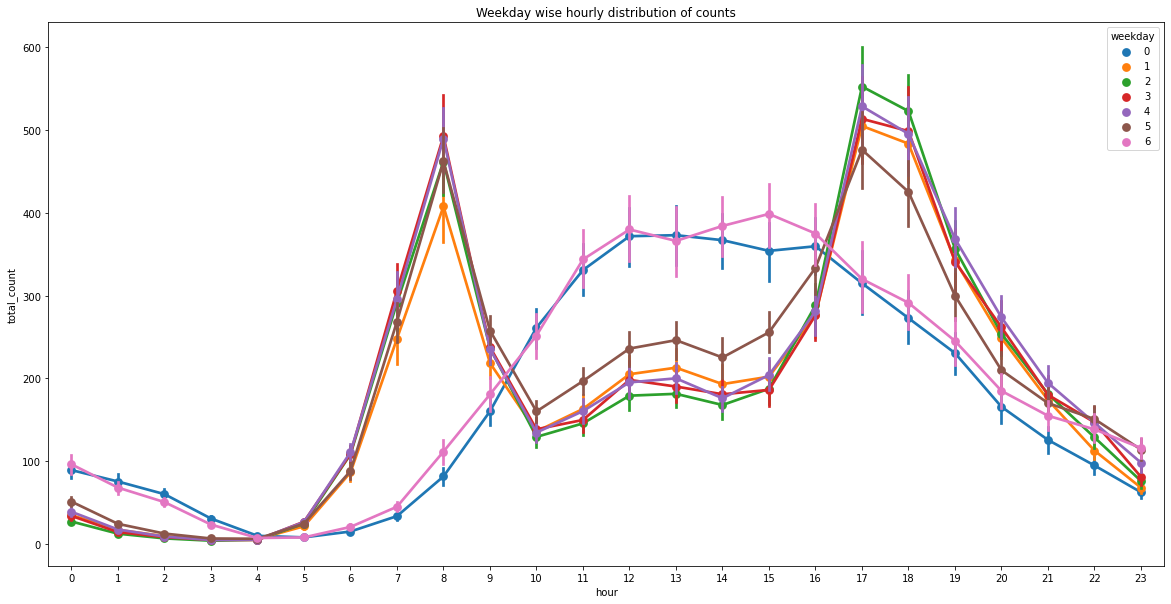

In [12]:
#Weekday wise hourly distribution of counts
fig,ax = plt.subplots(figsize=(20,10))
sns.pointplot(data=training_data[['hour',
                           'total_count',
                           'weekday']],
              x='hour',
              y='total_count',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

<AxesSubplot:title={'center':'Average number of rentals initiated  per day by weekday'}, xlabel='weekday'>

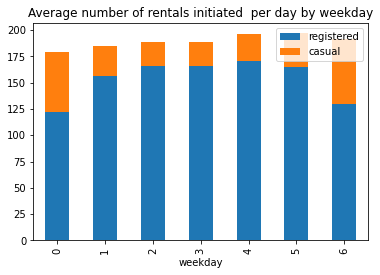

In [13]:
#Average number of rentals initiated  per day by weekday
weekday_df= training_data.groupby(['weekday'], as_index=True).agg({'registered':'mean','casual':'mean'})
weekday_df.plot.bar(stacked=True , title = 'Average number of rentals initiated  per day by weekday')

[Text(0.5, 1.0, 'Checking for outliners in day hours')]

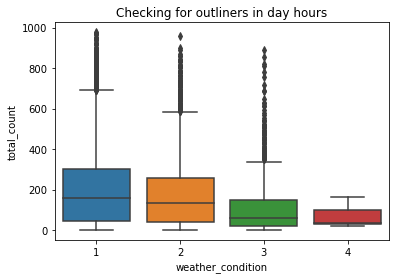

In [14]:
#box plot 
fig,ax = plt.subplots()
sns.boxplot(data=training_data[['total_count',
                          'weather_condition']],x='weather_condition',y='total_count',ax=ax)
ax.set(title="Checking for outliners in day hours")

<AxesSubplot:title={'center':'Average number of rentals per hour by weather'}, xlabel='weather_condition'>

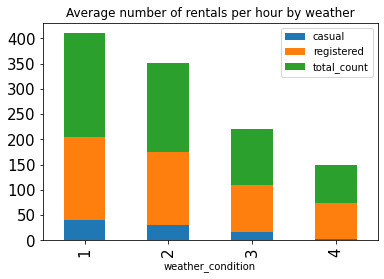

In [15]:
#Average number of rentals per hour by weather
weather_df = training_data.groupby('weather_condition', as_index=True).agg({'casual':'mean', 
                                                               'registered':'mean',
                                                                      'total_count':'mean'
                                                               })
weather_df.plot.bar(stacked=True,title = 'Average number of rentals per hour by weather', fontsize='15')

<AxesSubplot:title={'center':'The average number of rentals per hour changes with the temperature'}, xlabel='temp'>

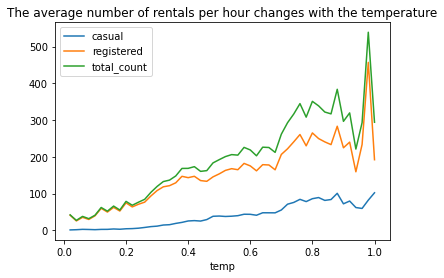

In [16]:
#The average number of rentals per hour changes with the temperature
wind_df = training_data.groupby(['temp'], as_index=True).agg({'casual':'mean', 
                                                               'registered':'mean',
                                                               'total_count':'mean'})
wind_df.plot(title = 'The average number of rentals per hour changes with the temperature')

<AxesSubplot:title={'center':'The max number of rentals initiated per hour changes with the windspeed'}, xlabel='windspeed'>

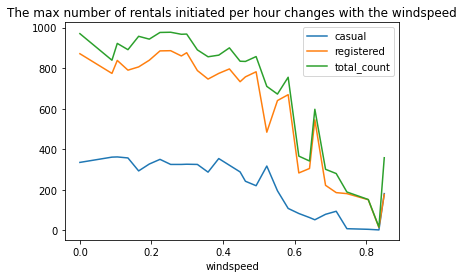

In [17]:
#The max number of rentals initiated per hour changes with the windspeed
wind_df = training_data.groupby(['windspeed'], as_index=True).agg({'casual':'max', 
                                                               'registered':'max',
                                                               'total_count':'max'})
wind_df.plot(title = 'The max number of rentals initiated per hour changes with the windspeed')

<AxesSubplot:title={'center':'Average number of rentals initiated per hour in different humidity'}, xlabel='humidity'>

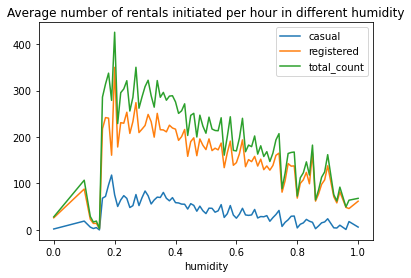

In [18]:
humidity_df = training_data.groupby(['humidity'], as_index=True).agg({'casual':'mean', 
                                                               'registered':'mean',
                                                               'total_count':'mean'})
humidity_df.plot(title = 'Average number of rentals initiated per hour in different humidity')

In [21]:
#regression model 
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np


In [24]:
X = training_data[['year','season','weekday','holiday','hour','weather_condition','temp','feeling_temp','humidity','windspeed']]
Y = training_data['total_count']

X = sm.add_constant(X)
reg_res = sm.OLS(Y,X).fit()
reg_res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     900.3
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:30:01   Log-Likelihood:                -88551.
No. Observations:               13903   AIC:                         1.771e+05
Df Residuals:                   13892   BIC:                         1.772e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -18.5125      7.661     -2.416      0.016     -33.530      -3.495
year                 78.7226      2.409     32.679      0.000      74.001      83.444
season               19.1712      1.168     16.413      0.000      16.882      21.461
weekday               1.8192      0.602      3.023      0.003       0.640       2.999
holiday             -22.4850      7.299     -3.081      0.002     -36.792      -8.178
hour                  7.7000      0.184     41.942      0.000       7.340       8.060
weather_condition    -2.1506      2.121     -1.014      0.311      -6.308       2.007
temp                 83.5071     40.037      2.086      0.037       5.029     161.985
feeling_temp        235.3353     44.975      5.233      0.000     147.179     323.491
humidity           -207.6495      7.643    -27.168      0.000    -222.631    -192.668
windspeed            33.5851     10.705      3.137      0.002      12.602      54.568
==============================================================================
Omnibus:                     2774.355   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5492.696
Skew:                           1.205   Prob(JB):                         0.00
Kurtosis:                       4.917   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
X = training_data[['year','season','hour','feeling_temp','humidity','windspeed']]
Y = training_data['total_count']

X = sm.add_constant(X)
reg_res = sm.OLS(Y,X).fit()
reg_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     1494.
Date:                Fri, 18 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:30:21   Log-Likelihood:                -88564.
No. Observations:               13903   AIC:                         1.771e+05
Df Residuals:                   13896   BIC:                         1.772e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2947      7.171     -2.412      0.016     -31.350      -3.239
year            78.6694      2.410     32.647      0.000      73.946      83.393
season          19.2797      1.168     16.511      0.000      16.991      21.569
hour             7.6716      0.183     42.009      0.000       7.314       8.030
feeling_temp   328.8151      7.485     43.931      0.000     314.144     343.486
humidity      -212.3672      6.787    -31.293      0.000    -225.670    -199.065
windspeed       36.9156     10.333      3.573      0.000      16.661      57.170
==============================================================================
Omnibus:                     2785.534   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5544.026
Skew:                           1.207   Prob(JB):                         0.00
Kurtosis:                       4.935   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""